In [2]:
# import the required libraries
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [14]:
! pip install --upgrade sqlalchemy

In [3]:
# PostgreSQL connection details (replace with your actual credentials)
POSTGRES_USER = 'postgres'
POSTGRES_PASSWORD = 'mysecretpassword'
POSTGRES_HOST = 'localhost'
POSTGRES_PORT = '5432'
DATABASE_NAME = 'truck_delay'


# Create a connection to the PostgreSQL database
engine = create_engine(f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{DATABASE_NAME}')

# Example: Load data from a table into a DataFrame
table_name = 'city_weather'  # Replace with your actual table name
query = f'SELECT * FROM {table_name}'

# Read the table data into a DataFrame
df = pd.read_sql(query, engine)

In [273]:
df.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0


In [274]:
df.shape

(55176, 14)

In [275]:
df.describe()

,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.0,55176.0,55176.0,55176.0
mean,1150.000000,36.896169,7.888647,0.003614,70.808141,5.168878,1019.413404,0.0,0.0,0.0,0.0
std,692.224928,21.766273,4.349798,0.023185,21.078367,1.639954,8.543195,0.0,0.0,0.0,0.0
min,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,575.000000,23.000000,5.000000,0.000000,57.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,1725.000000,48.000000,11.000000,0.000000,88.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,2300.000000,104.000000,33.000000,0.800000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [5]:
df["city_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0        C-927ceb5e
1        C-927ceb5e
2        C-927ceb5e
3        C-927ceb5e
4        C-927ceb5e
            ...    
55171    C-594514f8
55172    C-594514f8
55173    C-594514f8
55174    C-594514f8
55175    C-594514f8
Name: city_id, Length: 55176, dtype: object>

<Axes: >

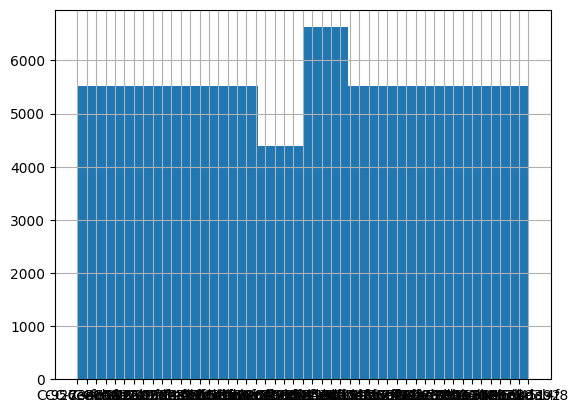

In [6]:
df["city_id"].hist()

C:\Users\pavan\AppData\Local\Temp\ipykernel_17524\3309897050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['humidity'])
c:\Desktop\Truck Project\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='humidity', ylabel='Density'>

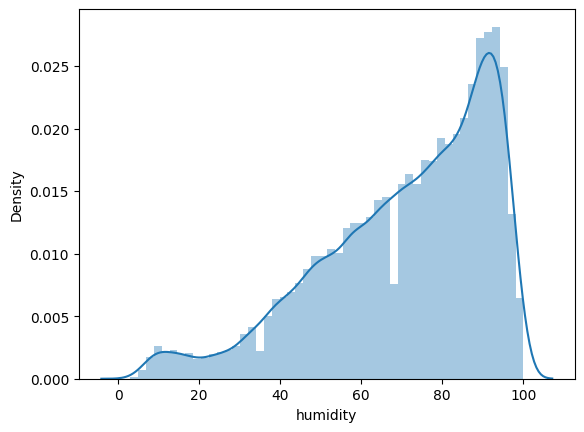

In [7]:
sns.distplot(df['humidity'])

In [9]:

#Add a custom index column starting from 1
df['index_column'] = range(1, len(df) + 1)

# Step 3: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df.columns if col != 'index_column']
df = df[cols]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_column     55176 non-null  int64  
 1   city_id          55176 non-null  object 
 2   date             55176 non-null  object 
 3   hour             55176 non-null  int64  
 4   temp             55176 non-null  int64  
 5   wind_speed       55176 non-null  int64  
 6   description      55176 non-null  object 
 7   precip           55176 non-null  float64
 8   humidity         55176 non-null  int64  
 9   visibility       55176 non-null  int64  
 10  pressure         55176 non-null  int64  
 11  chanceofrain     55176 non-null  int64  
 12  chanceoffog      55176 non-null  int64  
 13  chanceofsnow     55176 non-null  int64  
 14  chanceofthunder  55176 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 6.3+ MB


In [11]:
df.drop(columns=['chanceofrain', 'chanceoffog', 'chanceofsnow', 'chanceofthunder'],inplace=True)



In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_column  55176 non-null  int64  
 1   city_id       55176 non-null  object 
 2   date          55176 non-null  object 
 3   hour          55176 non-null  int64  
 4   temp          55176 non-null  int64  
 5   wind_speed    55176 non-null  int64  
 6   description   55176 non-null  object 
 7   precip        55176 non-null  float64
 8   humidity      55176 non-null  int64  
 9   visibility    55176 non-null  int64  
 10  pressure      55176 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 4.6+ MB


In [12]:
df.dropna(inplace=True)


In [13]:
df.dropna(axis=1, inplace=True)


In [14]:
df.drop_duplicates(inplace=True)


In [15]:
df.shape

(55176, 11)

In [16]:
df

,index_column,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,1,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019
1,2,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021
2,3,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022
3,4,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024
4,5,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018
55172,55173,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018
55173,55174,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019
55174,55175,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019


In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,index_column,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,1,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019
1,2,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021
2,3,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022
3,4,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024
4,5,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018
55172,55173,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018
55173,55174,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019
55174,55175,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019


In [18]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Format the 'hour' column as HH:MM:SS
df['hour'] = df['hour'].apply(lambda x: f"{x // 100:02}:{x % 100:02}:00")

# Combine 'date' and 'hour' into a new 'datetime' column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'])

# Drop the 'date' and 'hour' columns
df = df.drop(columns=['date', 'hour'])


In [19]:
df

,index_column,city_id,temp,wind_speed,description,precip,humidity,visibility,pressure,datetime
0,1,C-927ceb5e,30,11,Light snow,0.0,86,6,1019,2019-01-01 00:00:00
1,2,C-927ceb5e,28,12,Light snow,0.0,86,5,1021,2019-01-01 01:00:00
2,3,C-927ceb5e,28,13,Moderate snow,0.0,85,4,1022,2019-01-01 02:00:00
3,4,C-927ceb5e,28,14,Moderate snow,0.0,84,3,1024,2019-01-01 03:00:00
4,5,C-927ceb5e,28,13,Moderate snow,0.0,84,3,1025,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,0.0,74,6,1018,2019-02-15 19:00:00
55172,55173,C-594514f8,23,3,Light snow,0.0,74,6,1018,2019-02-15 20:00:00
55173,55174,C-594514f8,23,3,Light snow,0.0,75,6,1019,2019-02-15 21:00:00
55174,55175,C-594514f8,23,2,Light snow,0.0,75,6,1019,2019-02-15 22:00:00


In [20]:
# Add or update the 'event_time' column with a specific datetime value
df['event_time'] = pd.to_datetime('2024-09-17')


In [293]:
df

,index_column,city_id,temp,wind_speed,description,precip,humidity,visibility,pressure,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,0.0,86,6,1019,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,0.0,86,5,1021,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,0.0,85,4,1022,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,0.0,84,3,1024,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,0.0,84,3,1025,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,0.0,74,6,1018,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,0.0,74,6,1018,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,0.0,75,6,1019,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,0.0,75,6,1019,2019-02-15 22:00:00,2024-09-17


In [21]:
df.drop(columns=["precip","humidity","pressure","visibility"],inplace=True)

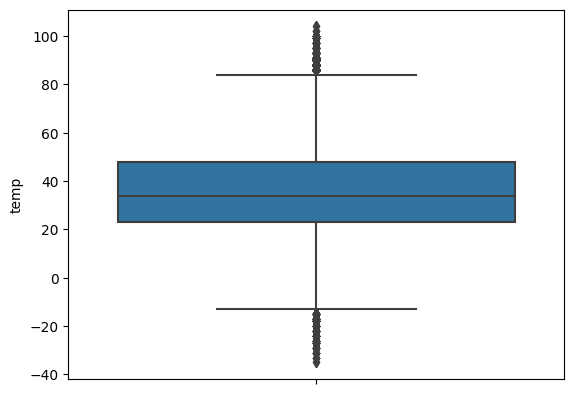

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for a specific column
sns.boxplot(y=df['temp'])
plt.show()


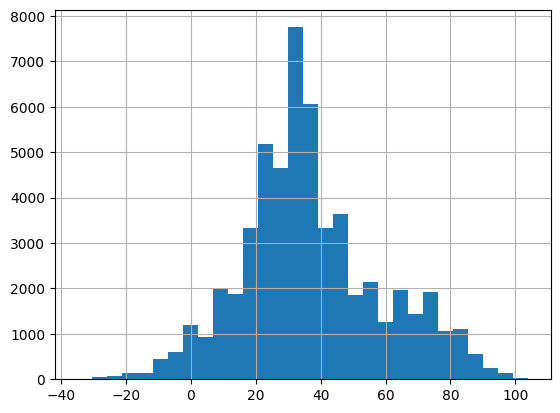

In [24]:
df['temp'].hist(bins=30)
plt.show()


In [25]:
df

,index_column,city_id,temp,wind_speed,description,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,2019-02-15 22:00:00,2024-09-17


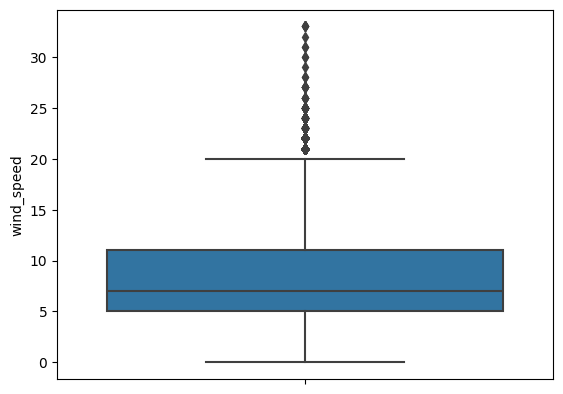

In [26]:
sns.boxplot(y=df['wind_speed'])
plt.show()

In [27]:
df

,index_column,city_id,temp,wind_speed,description,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,2019-02-15 22:00:00,2024-09-17


In [28]:
# Columns from where outliers need to be removed
columns_to_check = ['temp','wind_speed']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)

       index_column     city_id  temp  wind_speed    description  \
0                 1  C-927ceb5e    30          11     Light snow   
1                 2  C-927ceb5e    28          12     Light snow   
2                 3  C-927ceb5e    28          13  Moderate snow   
3                 4  C-927ceb5e    28          14  Moderate snow   
4                 5  C-927ceb5e    28          13  Moderate snow   
...             ...         ...   ...         ...            ...   
55171         55172  C-594514f8    23           3         Cloudy   
55172         55173  C-594514f8    23           3     Light snow   
55173         55174  C-594514f8    23           3     Light snow   
55174         55175  C-594514f8    23           2     Light snow   
55175         55176  C-594514f8    23           2     Light snow   

                 datetime event_time  
0     2019-01-01 00:00:00 2024-09-17  
1     2019-01-01 01:00:00 2024-09-17  
2     2019-01-01 02:00:00 2024-09-17  
3     2019-01-01 03:00:00 2

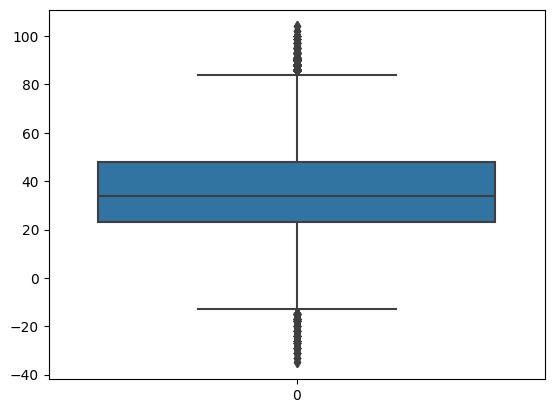

In [29]:
sns.boxplot(df["temp"])
plt.show()

In [30]:
df_cleaned

,index_column,city_id,temp,wind_speed,description,datetime,event_time
0,1,C-927ceb5e,30,11,Light snow,2019-01-01 00:00:00,2024-09-17
1,2,C-927ceb5e,28,12,Light snow,2019-01-01 01:00:00,2024-09-17
2,3,C-927ceb5e,28,13,Moderate snow,2019-01-01 02:00:00,2024-09-17
3,4,C-927ceb5e,28,14,Moderate snow,2019-01-01 03:00:00,2024-09-17
4,5,C-927ceb5e,28,13,Moderate snow,2019-01-01 04:00:00,2024-09-17
...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,2019-02-15 19:00:00,2024-09-17
55172,55173,C-594514f8,23,3,Light snow,2019-02-15 20:00:00,2024-09-17
55173,55174,C-594514f8,23,3,Light snow,2019-02-15 21:00:00,2024-09-17
55174,55175,C-594514f8,23,2,Light snow,2019-02-15 22:00:00,2024-09-17


In [31]:
!pip install hopsworks

  Using cached SQLAlchemy-1.4.48-cp310-cp310-win_amd64.whl.metadata (10 kB)
Using cached SQLAlchemy-1.4.48-cp310-cp310-win_amd64.whl (1.6 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35


  You can safely remove it manually.


In [35]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()



AttributeError: module 'great_expectations' has no attribute 'core'

In [2]:
city_weather_fg = fs.get_or_create_feature_group(
    name="city_weather",
    version=1,
    description="city_weather",
    online_enabled=True,
    primary_key=['RowIndex'],
    event_time='event_time',
    
)

In [4]:
city_weather_fg.insert(df)

NameError: name 'df' is not defined

In [309]:
pip show sqlalchemy


Name: SQLAlchemy
Version: 1.3.24
Summary: Database Abstraction Library
Home-page: http://www.sqlalchemy.org
Author: Mike Bayer
Author-email: mike_mp@zzzcomputing.com
License: MIT
Location: c:\desktop\truck project\.venv\lib\site-packages
Requires: 
Required-by: alembic, hsfs, mlflow
Note: you may need to restart the kernel to use updated packages.


In [303]:
df.to_csv(r'C:\Desktop\Truck Project\data\cleaned\cleaned_city_weather.csv', index=False)

In [304]:
fgjtdghjrtyujhgdty

NameError: name 'fgjtdghjrtyujhgdty' is not defined

#drivers_table

In [225]:
# PostgreSQL connection details (replace with your actual credentials)
POSTGRES_USER = 'postgres'
POSTGRES_PASSWORD = 'mysecretpassword'
POSTGRES_HOST = 'localhost'
POSTGRES_PORT = '5432'
DATABASE_NAME = 'truck_delay'

# Create a connection to the PostgreSQL database
engine = create_engine(f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{DATABASE_NAME}')

# Example: Load data from a table into a DataFrame
table_name = 'drivers_table'  # Replace with your actual table name
query = f'SELECT * FROM {table_name}'

# Read the table data into a DataFrame
df = pd.read_sql(query, engine)

In [226]:
df.to_csv(r'C:\Desktop\Truck Project\data\raw\drivers_table.csv',index=False)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [228]:
df.isnull().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

In [229]:
#df.dropna(inplace=True,axis=1)

In [230]:
df.isnull().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

In [231]:
 # Fills NaN with the last valid value (forward fill)
 df[['gender','driving_style']] = df[['gender','driving_style']].fillna(method='ffill') 
 

C:\Users\pavan\AppData\Local\Temp\ipykernel_31804\517263077.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['gender','driving_style']] = df[['gender','driving_style']].fillna(method='ffill')


In [232]:
df.isnull().sum()

driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64

In [233]:

#Add a custom index column starting from 1
df['index_column'] = range(1, len(df) + 1)

# Step 3: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df.columns if col != 'index_column']
df = df[cols]

In [234]:
df

,index_column,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65
...,...,...,...,...,...,...,...,...,...,...
1295,1296,57f77e99-8,Robert Johnson,male,60,26,proactive,4,17792974,60.64
1296,1297,e64c4059-8,Patrick Hernandez,male,46,20,proactive,8,17248432,58.42
1297,1298,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,7,21865328,48.29
1298,1299,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,8,33564827,43.14


In [235]:
df.drop(columns=["vehicle_no","ratings"],inplace=True,axis=1)

In [236]:
df

,index_column,driver_id,name,gender,age,experience,driving_style,average_speed_mph
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,62.22
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,60.89
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,53.67
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,59.82
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,62.65
...,...,...,...,...,...,...,...,...
1295,1296,57f77e99-8,Robert Johnson,male,60,26,proactive,60.64
1296,1297,e64c4059-8,Patrick Hernandez,male,46,20,proactive,58.42
1297,1298,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,48.29
1298,1299,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,43.14


In [237]:
df['event_time']= pd.to_datetime('2024-09-17')

In [238]:
df

,index_column,driver_id,name,gender,age,experience,driving_style,average_speed_mph,event_time
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,62.22,2024-09-17
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,60.89,2024-09-17
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,53.67,2024-09-17
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,59.82,2024-09-17
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,62.65,2024-09-17
...,...,...,...,...,...,...,...,...,...
1295,1296,57f77e99-8,Robert Johnson,male,60,26,proactive,60.64,2024-09-17
1296,1297,e64c4059-8,Patrick Hernandez,male,46,20,proactive,58.42,2024-09-17
1297,1298,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,48.29,2024-09-17
1298,1299,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,43.14,2024-09-17


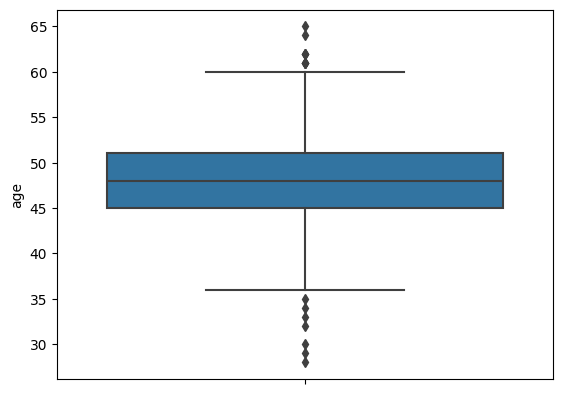

In [239]:
sns.boxplot(y=df["age"])
plt.show()

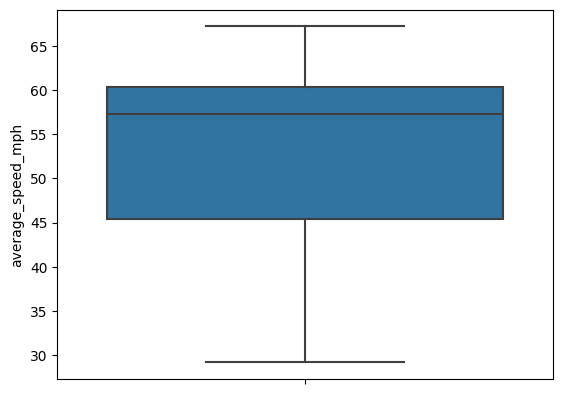

In [240]:
sns.boxplot(y=df["average_speed_mph"])
plt.show()

In [241]:

# Columns from where outliers need to be removed
columns_to_check = ["age"]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)


      index_column   driver_id               name gender  age  experience  \
0                1  d9f30553-6       Daniel Marks   male   47           5   
1                2  82de7bb8-2      Clifford Carr   male   47          14   
2                3  7e789842-4  Terry Faulkner MD   male   41           9   
3                4  b2555587-8     Brendan Jacobs   male   44          10   
4                5  b2e58421-d      Vincent Davis   male   41          10   
...            ...         ...                ...    ...  ...         ...   
1295          1296  57f77e99-8     Robert Johnson   male   60          26   
1296          1297  e64c4059-8  Patrick Hernandez   male   46          20   
1297          1298  7e6a0cf5-1      Richard Ortiz   male   49          10   
1298          1299  c4a966b0-b    Peter Rodriguez   male   49           5   
1299          1300  e5d104b5-1   Michael Robinson   male   56          24   

     driving_style  average_speed_mph event_time  
0        proactive      

In [242]:
df.to_csv(r"C:\Desktop\Truck Project\data\cleaned\cleaned_drivers_table.csv",index=False)

In [243]:
# PostgreSQL connection details (replace with your actual credentials)
POSTGRES_USER = 'postgres'
POSTGRES_PASSWORD = 'mysecretpassword'
POSTGRES_HOST = 'localhost'
POSTGRES_PORT = '5432'
DATABASE_NAME = 'truck_delay'

# Create a connection to the PostgreSQL database
engine = create_engine(f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{DATABASE_NAME}')

# Example: Load data from a table into a DataFrame
table_name = 'routes_table'  # Replace with your actual table name
query = f'SELECT * FROM {table_name}'

# Read the table data into a DataFrame
df = pd.read_sql(query, engine)

In [244]:
df.to_csv(r'C:\Desktop\Truck Project\data\raw\routes_table.csv',index=False)

In [245]:
#Add a custom index column starting from 1
df['index_column'] = range(1, len(df) + 1)

# Step 3: Reorder columns to make 'index_column' the first column
cols = ['index_column'] + [col for col in df.columns if col != 'index_column']
df = df[cols]


In [246]:
df

,index_column,route_id,origin_id,destination_id,distance,average_hours
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22
...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22


In [247]:
#event_time
df['event_time']= pd.to_datetime('2024-09-17')

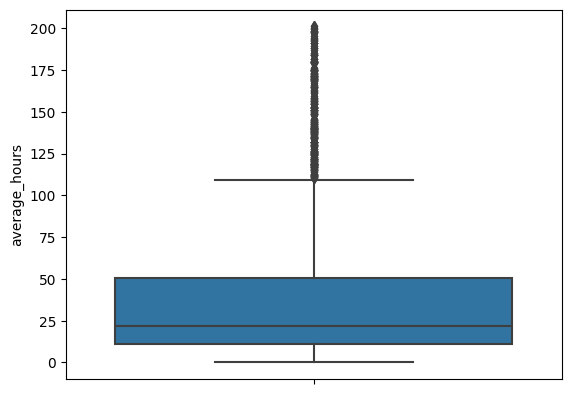

In [248]:
sns.boxplot(y=df["average_hours"])
plt.show()

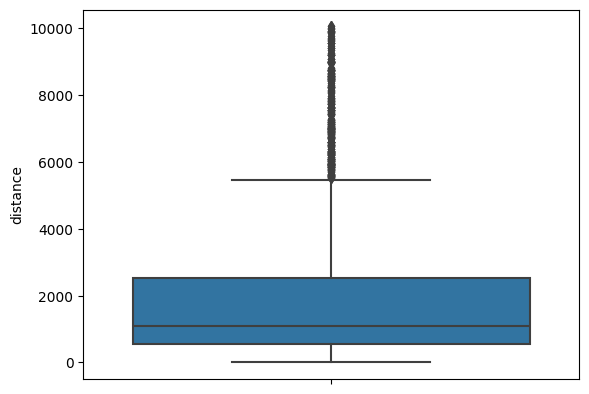

In [249]:
sns.boxplot(y=df["distance"])
plt.show()

In [250]:
df.isnull().sum()

index_column      0
route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
event_time        0
dtype: int64

In [251]:
df.dropna()

,index_column,route_id,origin_id,destination_id,distance,average_hours,event_time
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70,2024-09-17
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96,2024-09-17
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57,2024-09-17
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86,2024-09-17
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22,2024-09-17
...,...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68,2024-09-17
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46,2024-09-17
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45,2024-09-17
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22,2024-09-17


In [252]:
df.drop_duplicates()

,index_column,route_id,origin_id,destination_id,distance,average_hours,event_time
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70,2024-09-17
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96,2024-09-17
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57,2024-09-17
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86,2024-09-17
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22,2024-09-17
...,...,...,...,...,...,...,...
2347,2348,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68,2024-09-17
2348,2349,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46,2024-09-17
2349,2350,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45,2024-09-17
2350,2351,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22,2024-09-17


In [253]:
# Columns from where outliers need to be removed
columns_to_check = ['distance' ,'average_hours']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)



      index_column    route_id   origin_id destination_id  distance  \
0                1  R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06   
1                2  R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24   
3                4  R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01   
4                5  R-b236e347  C-927ceb5e     C-d80a1e7d    310.75   
5                6  R-93f348a8  C-927ceb5e     C-c92599e2   1810.21   
...            ...         ...         ...            ...       ...   
2346          2347  R-88d4c432  C-594514f8     C-90e30162    578.31   
2348          2349  R-64f64afb  C-594514f8     C-56b68559    272.90   
2349          2350  R-0e0ac567  C-594514f8     C-328bd8d3    172.74   
2350          2351  R-5ccd3200  C-594514f8     C-841ebdcb    960.93   
2351          2352  R-38a366a9  C-594514f8     C-e6dcda92    472.61   

      average_hours event_time  
0             34.70 2024-09-17  
1             29.96 2024-09-17  
3             30.86 2024-09-17  
4              

In [254]:
df.to_csv(r"C:\Desktop\Truck Project\data\cleaned\cleaned_routes_table.csv",index=True)

In [255]:
# PostgreSQL connection details (replace with your actual credentials)
POSTGRES_USER = 'postgres'
POSTGRES_PASSWORD = 'mysecretpassword'
POSTGRES_HOST = 'localhost'
POSTGRES_PORT = '5432'
DATABASE_NAME = 'truck_delay'

# Create a connection to the PostgreSQL database
engine = create_engine(f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{DATABASE_NAME}')

# Example: Load data from a table into a DataFrame
table_name = 'routes_weather'  # Replace with your actual table name
query = f'SELECT * FROM {table_name}'

# Read the table data into a DataFrame
df = pd.read_sql(query, engine)

In [256]:
df.to_csv(r"C:\Desktop\Truck Project\data\raw\routes_weather.csv",index=False)

In [257]:
df

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,0.0,53,6,1015,0,0,0,0
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,0.0,57,6,1015,0,0,0,0
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,0.0,62,6,1015,0,0,0,0
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,0.0,66,6,1015,0,0,0,0


In [258]:
df.dropna()

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,0.0,53,6,1015,0,0,0,0
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,0.0,57,6,1015,0,0,0,0
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,0.0,62,6,1015,0,0,0,0
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,0.0,66,6,1015,0,0,0,0


In [259]:
df.isnull().sum()

route_id           0
Date               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [263]:
df.drop(columns=["chanceofrain", "chanceoffog", "chanceofsnow", "chanceofthunder"], inplace=True)


In [261]:
df['event_time']= pd.to_datetime('2024-09-17')

In [262]:
df

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0,2024-09-17
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0,2024-09-17
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0,2024-09-17
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0,2024-09-17
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0,2024-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,0.0,53,6,1015,0,0,0,0,2024-09-17
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,0.0,57,6,1015,0,0,0,0,2024-09-17
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,0.0,62,6,1015,0,0,0,0,2024-09-17
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,0.0,66,6,1015,0,0,0,0,2024-09-17


In [264]:
df.drop(columns=["precip"], inplace=True)


In [265]:
df

,route_id,Date,temp,wind_speed,description,humidity,visibility,pressure,event_time
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,90,1,1010,2024-09-17
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,91,3,1012,2024-09-17
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,91,4,1013,2024-09-17
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,92,6,1015,2024-09-17
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,93,6,1016,2024-09-17
...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,53,6,1015,2024-09-17
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,57,6,1015,2024-09-17
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,62,6,1015,2024-09-17
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,66,6,1015,2024-09-17


In [266]:
df.drop_duplicates()

,route_id,Date,temp,wind_speed,description,humidity,visibility,pressure,event_time
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,90,1,1010,2024-09-17
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,91,3,1012,2024-09-17
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,91,4,1013,2024-09-17
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,92,6,1015,2024-09-17
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,93,6,1016,2024-09-17
...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,53,6,1015,2024-09-17
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,57,6,1015,2024-09-17
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,62,6,1015,2024-09-17
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,66,6,1015,2024-09-17


In [268]:
# Columns from where outliers need to be removed
columns_to_check = ['temp','wind_speed','humidity',"visibility","pressure"]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)



          route_id                 Date  temp  wind_speed    description  \
3       R-ada2a391  2019-01-02 06:00:00    27          11         Cloudy   
4       R-ada2a391  2019-01-03 00:00:00    27           9         Cloudy   
5       R-ada2a391  2019-01-03 06:00:00    27           8  Partly cloudy   
6       R-ada2a391  2019-01-04 00:00:00    27           7  Partly cloudy   
7       R-ada2a391  2019-01-04 06:00:00    28           8  Partly cloudy   
...            ...                  ...   ...         ...            ...   
425707  R-2fd2ee05  2019-02-12 18:00:00    70          12          Sunny   
425708  R-2fd2ee05  2019-02-13 12:00:00    68          11          Sunny   
425709  R-2fd2ee05  2019-02-13 18:00:00    66           9          Sunny   
425710  R-2fd2ee05  2019-02-14 12:00:00    63           7          Clear   
425711  R-2fd2ee05  2019-02-14 18:00:00    61           6          Clear   

        humidity  visibility  pressure event_time  
3             92           6      1

In [269]:
df.to_csv(r"C:\Desktop\Truck Project\data\cleaned\cleaned_routes_weather.csv",index=False)